<a href="https://colab.research.google.com/github/Faiza-AS/lesson-11-exercise/blob/main/Copy_of_Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import json
import numpy as np
import os, sys
from collections import Counter
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.nn.utils.rnn as rnn_utils
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from random import choice
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1812
torch.Size([1449, 545, 128])
[[  0  44   0]
 [  0 256   0]
 [  0  63   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.71      1.00      0.83       256
           2       0.00      0.00      0.00        63

    accuracy                           0.71       363
   macro avg       0.24      0.33      0.28       363
weighted avg       0.50      0.71      0.58       363



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0, Batch_index:0,  Loss: 1.06754,   Acc: 48.438% 
Epoch: 0, Batch_index:1,  Loss: 0.70408,   Acc: 76.562% 
Epoch: 0, Batch_index:2,  Loss: 0.98436,   Acc: 70.312% 
Epoch: 0, Batch_index:3,  Loss: 0.93623,   Acc: 70.312% 
Epoch: 0, Batch_index:4,  Loss: 1.08895,   Acc: 64.062% 
Epoch: 0, Batch_index:5,  Loss: 0.72272,   Acc: 75.000% 
Epoch: 0, Batch_index:6,  Loss: 0.93907,   Acc: 59.375% 
Epoch: 0, Batch_index:7,  Loss: 0.81509,   Acc: 70.312% 
Epoch: 0, Batch_index:8,  Loss: 0.89711,   Acc: 64.062% 
Epoch: 0, Batch_index:9,  Loss: 0.85279,   Acc: 71.875% 
Epoch: 0, Batch_index:10,  Loss: 0.84383,   Acc: 70.312% 
Epoch: 0, Batch_index:11,  Loss: 0.95553,   Acc: 57.812% 
Epoch: 0, Batch_index:12,  Loss: 0.75846,   Acc: 73.438% 
Epoch: 0, Batch_index:13,  Loss: 0.69996,   Acc: 76.562% 
Epoch: 0, Batch_index:14,  Loss: 0.78829,   Acc: 70.312% 
Epoch: 0, Batch_index:15,  Loss: 0.77714,   Acc: 71.875% 
Epoch: 0, Batch_index:16,  Loss: 0.82828,   Acc: 70.312% 
Epoch: 0, Batch_index:17

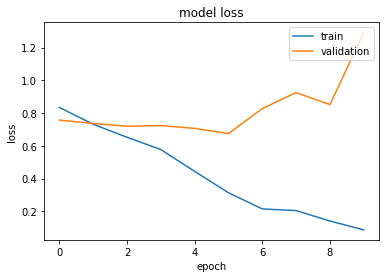

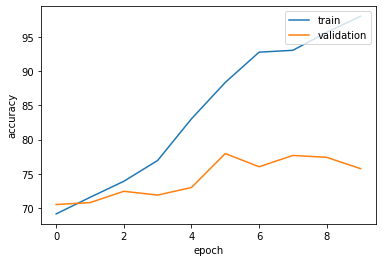

In test phase for each action...
[0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Class c: 0, micro f1: 0.766, macro f1: 0.483
confusion matrix:  [[ 5  4  0]
 [ 2 31  0]
 [ 1  4  0]]


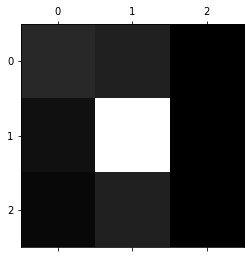

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
Class c: 1, micro f1: 0.696, macro f1: 0.510
confusion matrix:  [[ 3  3  1]
 [ 2 34  0]
 [ 1 10  2]]


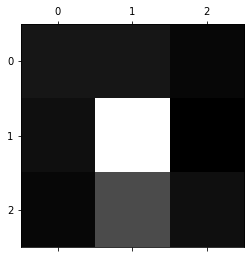

[1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Class c: 2, micro f1: 0.741, macro f1: 0.396
confusion matrix:  [[ 0  6  0]
 [ 0 38  0]
 [ 1  7  2]]


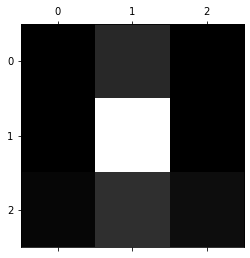

[2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0]
[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0]
Class c: 3, micro f1: 0.500, macro f1: 0.409
confusion matrix:  [[3 0 0]
 [2 4 0]
 [4 1 0]]


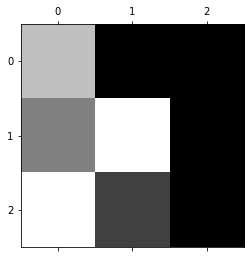

[1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2]
[1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1]
Class c: 4, micro f1: 0.679, macro f1: 0.635
confusion matrix:  [[ 3  3  0]
 [ 0 28  0]
 [ 0 15  7]]


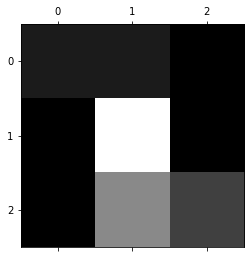

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Class c: 5, micro f1: 0.800, macro f1: 0.517
confusion matrix:  [[ 1  0  0]
 [ 1 23  0]
 [ 0  5  0]]


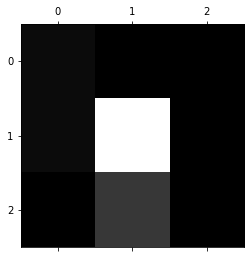

[1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 

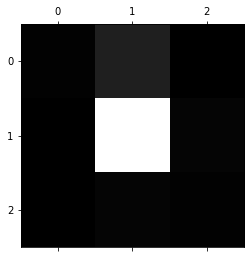

torch.Size([1449, 545, 128])
[[  0  44   0]
 [  0 256   0]
 [  0  63   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.71      1.00      0.83       256
           2       0.00      0.00      0.00        63

    accuracy                           0.71       363
   macro avg       0.24      0.33      0.28       363
weighted avg       0.50      0.71      0.58       363



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0, Batch_index:0,  Loss: 1.14511,   Acc: 18.750% 
Epoch: 0, Batch_index:1,  Loss: 0.94561,   Acc: 62.500% 
Epoch: 0, Batch_index:2,  Loss: 0.76062,   Acc: 73.438% 
Epoch: 0, Batch_index:3,  Loss: 0.65814,   Acc: 79.688% 
Epoch: 0, Batch_index:4,  Loss: 0.95613,   Acc: 64.062% 
Epoch: 0, Batch_index:5,  Loss: 0.70625,   Acc: 73.438% 
Epoch: 0, Batch_index:6,  Loss: 0.79777,   Acc: 70.312% 
Epoch: 0, Batch_index:7,  Loss: 0.90213,   Acc: 64.062% 
Epoch: 0, Batch_index:8,  Loss: 0.78967,   Acc: 71.875% 
Epoch: 0, Batch_index:9,  Loss: 0.82055,   Acc: 70.312% 
Epoch: 0, Batch_index:10,  Loss: 0.79491,   Acc: 75.000% 
Epoch: 0, Batch_index:11,  Loss: 0.72844,   Acc: 75.000% 
Epoch: 0, Batch_index:12,  Loss: 0.77341,   Acc: 71.875% 
Epoch: 0, Batch_index:13,  Loss: 0.75358,   Acc: 73.438% 
Epoch: 0, Batch_index:14,  Loss: 0.60410,   Acc: 79.688% 
Epoch: 0, Batch_index:15,  Loss: 0.76944,   Acc: 73.438% 
Epoch: 0, Batch_index:16,  Loss: 0.94099,   Acc: 65.625% 
Epoch: 0, Batch_index:17

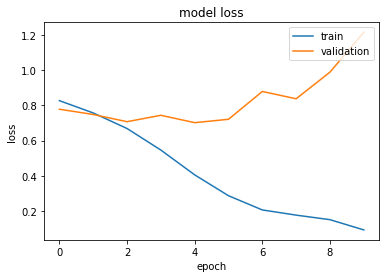

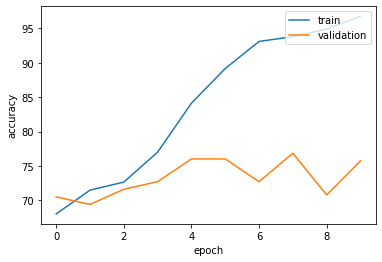

In test phase for each action...
[0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Class c: 0, micro f1: 0.766, macro f1: 0.507
confusion matrix:  [[ 7  2  0]
 [ 4 29  0]
 [ 1  4  0]]


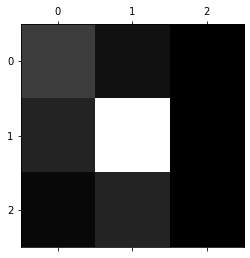

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]
[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
Class c: 1, micro f1: 0.732, macro f1: 0.617
confusion matrix:  [[ 5  1  1]
 [ 3 32  1]
 [ 2  7  4]]


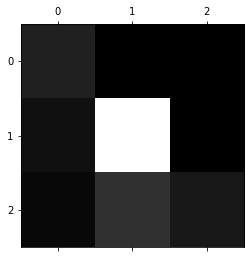

[1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Class c: 2, micro f1: 0.722, macro f1: 0.383
confusion matrix:  [[ 0  6  0]
 [ 0 37  1]
 [ 1  7  2]]


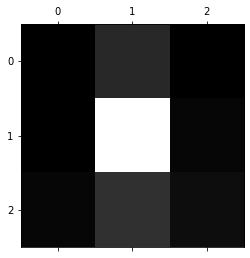

[2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
Class c: 3, micro f1: 0.357, macro f1: 0.300
confusion matrix:  [[3 0 0]
 [4 2 0]
 [5 0 0]]


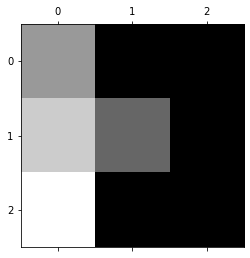

[1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2]
[1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1]
Class c: 4, micro f1: 0.696, macro f1: 0.683
confusion matrix:  [[ 4  2  0]
 [ 0 28  0]
 [ 0 15  7]]


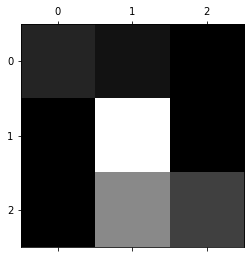

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Class c: 5, micro f1: 0.800, macro f1: 0.467
confusion matrix:  [[ 1  0  0]
 [ 1 23  0]
 [ 1  4  0]]


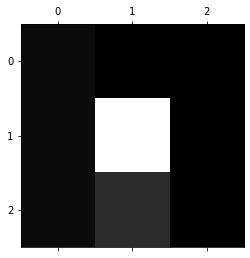

[1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

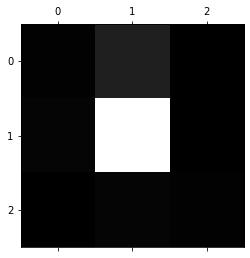

micro f1 accuracy: 
[0.7575757575757576, 0.7575757575757576]
macro f1 result: 
[0.533583972608363, 0.5612231792844223]


In [6]:
#读取json文件
drive.mount('/content/drive')
#from focal_loss import *
def sp_json(file_path):
    load_dict = json.load(open(file_path, 'r', encoding='utf-8'))
    frame_data = load_dict['frames']
    frame_num = len(frame_data)
    joint_data = [0 for x in range(frame_num)]
    for i in range(frame_num):
        frame_data_i = frame_data[i] 
        body_data_i = frame_data_i['bodies']
        if len(body_data_i) == 1:
            body_data_i = body_data_i[0]
            joint_data_i = body_data_i['joint_orientations']
        else:
            joint_data_i = [0 for x in range(128)]
        joint_data[i] = np.array(joint_data_i).flatten().tolist()
    return joint_data

class MyDataset(Dataset):
    def __init__(self, data, seq_len, labels):
        self.data = data
        self.seq_len = seq_len
        self.labels = labels

    def __getitem__(self, index):
        return self.data[index], self.seq_len[index], self.labels[index]

    def __len__(self):
        return len(self.data)


class BlockFCNConv(nn.Module):
    def __init__(self, in_channel, out_channel, kernel_size, momentum=0.99, epsilon=0.001, squeeze=False):
        super().__init__()
        self.conv = nn.Conv1d(in_channel, out_channel, kernel_size, padding=int((kernel_size-1)/2))
        self.batch_norm = nn.BatchNorm1d(num_features=out_channel, eps=epsilon, momentum=momentum)
        self.relu = nn.ReLU()
    def forward(self, x):
        # input (batch_size, num_variables, time_steps), e.g. (64, 128, 545)
        x = self.conv(x)
        # input (batch_size, out_channel, L_out)
        x = self.batch_norm(x)
        # same shape as input
        y = self.relu(x)
        return y  

class BlockFCN(nn.Module):
    def __init__(self, time_steps, channels, kernels, mom=0.99, eps=0.001):
        super().__init__()
        self.conv1 = BlockFCNConv(channels[0], channels[1], kernels[0], momentum=mom, epsilon=eps, squeeze=True)
        self.conv2 = BlockFCNConv(channels[1], channels[2], kernels[1], momentum=mom, epsilon=eps, squeeze=True)
        self.conv3 = BlockFCNConv(channels[2], channels[3], kernels[2], momentum=mom, epsilon=eps)
        output_size = time_steps - sum(kernels) + len(kernels)
        self.global_pooling = nn.AvgPool1d(kernel_size=output_size)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        # apply Global Average Pooling 1D
        y = self.global_pooling(x)
        return y

if __name__ == '__main__':
    joint_root_path = '/content/drive/MyDrive/Frontt'
    score_root_path = '/content/drive/MyDrive'
    sub_path = os.listdir(joint_root_path)
    file_num = len(sub_path)
    torch_joints = [] #1812
    evaluate_labels = []  #1812
    class_labels = []
    BATCH_SIZE = 64
    NUM_EPOCHS =10
    learning_rate=0.01  #学习率
    NUM_OF_TESTS = 2
    net_params = {'channel_params':[128, 64, 128, 64], 'kernel_params_1':[7, 7, 7], 'kernel_params_2':[5, 5, 5], 'kernel_params_3':[3, 3, 3], 'seq_len': 545, 'num_classes': 3}
    triplet_sample_classes = [(0, 0, 1), (1, 1, 0), (1, 1, 2), (2, 2, 1)]
    classes_mapping = {0: 0, 1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 3, 8: 4, 9: 4, 10: 5, 11: 6, 12: 6, 13: 6, 14: 6}
    json_scores = json.load(open(os.path.join(score_root_path, "Experts_score.json")))
    print(file_num)

    #loading files one by one by episodes and working on them 

    for i in range(file_num):
        short_path = sub_path[i]
        file_path = os.path.join(joint_root_path, short_path)
        #print(file_path)
        load_list = sp_json(file_path)
        load_list_scale = preprocessing.scale(load_list)
        #print('load list', load_list_scale)
        subject_index = short_path[short_path.index('_s')+1:short_path.index('_s')+4]
        action_index = short_path[short_path.index('_m')+1:short_path.index('_m')+4]
        episode_index = short_path[short_path.index('_e')+1:short_path.index('_e')+3]
        experts_score = json_scores[subject_index][action_index][episode_index]
        experts_score_count = Counter(experts_score)
        #print(subject_index)
        #print(action_index)
        #print(episode_index)
        #print(experts_score_count)
        # most common element in experts_score_count, retunr s top 1 most common element 
        most_common_score = experts_score_count.most_common(1)[0]
        #print('most c score', most_common_score)

        #so if top most common score is equal to 1 then we continue in the loop
        if(most_common_score[1] == 1):
            continue
        else:
            final_score = most_common_score[0]
            #print('final ', final_score)
            torch_joints.append(torch.tensor(load_list_scale, dtype=torch.float))
            #print('torch joints ',torch_joints)
            evaluate_labels.append(final_score - 1)
            #print('evlatuate labels', evaluate_labels)
            class_labels.append(classes_mapping[int(action_index[1:])-1]) 
            #print('class labels', class_labels)
            

    data = rnn_utils.pad_sequence(torch_joints, batch_first=True, padding_value=0)
    data_length = [s.size(0) for s in torch_joints]
    #print(data_length)
    data_length = torch.tensor(data_length, dtype=torch.int64)
   # print('2     ', data_length)
    labels = torch.tensor(evaluate_labels, dtype=torch.int64)
    class_labels = torch.tensor(class_labels, dtype=torch.int64)
    final_micro_f1_results = []
    final_macro_f1_results = []
    final_kappa_results = []
    
    for i in range(NUM_OF_TESTS):
        x_train, x_test, l_train, l_test, y_train, y_test, z_train, z_test = train_test_split(data, data_length, labels, class_labels, test_size=0.2, random_state=0)
        # 建立训练集的dataloader
        #1087 train dataset and 725 the train one due to 1/4 ratio

        train_dataset = MyDataset(x_train, l_train, y_train)
       # print('training x',x_train)
        #print('testing x ', x_test)
        #print('training y',y_train)
        #print('testing y ', y_test)
        #print('training z',z_train)
        #print('testing z ', z_test)
        #print('training l',l_train)
        #print('testing l ', l_test)
        #print('data', data)
        #print ('data length', data_length)
        #print('labels', labels)
        #print('class labels', class_labels)
        train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
        #print(train_loader)
        # 建立测试集的dataloader
        #x train is the data set, l train are the indexes, z train are the classes 7, y train are the score from the evaluate labels
        test_dataset = MyDataset(x_test, l_test, y_test)
        test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle = False)
        
        print (x_train.shape)

        nsamples, nx, ny = x_train.shape
        d2_x_train = x_train.reshape((nsamples,nx*ny))
        nsamples2, nx2, ny2 = x_test.shape
        d2_x_test = x_test.reshape((nsamples2,nx2*ny2))
        svclassifier = SVC(kernel='poly', degree=8)
        svclassifier.fit(d2_x_train, y_train)
        y_pred = svclassifier.predict(d2_x_test)
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))

        #定义loss损失函数和optimizer
        model1 = BlockFCN(net_params['seq_len'], net_params['channel_params'], net_params['kernel_params_1'])
        model2 = BlockFCN(net_params['seq_len'], net_params['channel_params'], net_params['kernel_params_2'])
        model3 = BlockFCN(net_params['seq_len'], net_params['channel_params'], net_params['kernel_params_3'])
        fc = nn.Linear(3*net_params['channel_params'][-1], net_params['num_classes'])
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam([{'params': model1.parameters()}, {'params': model2.parameters()}, {'params': model3.parameters()}, {'params': fc.parameters()}], lr = learning_rate)
       
        # Train
        train_loss_list=[]
        val_loss_list=[]
        acc_list=[]
        acc_val_list=[]
        for epoch in range(NUM_EPOCHS):
            train_loss = 0.0 #
            total_right_num = 0.0 #468
            train_num = 0.0 #only goes till 1087 64, 128, multiples of 64
            model1.train()
            model2.train()
            model3.train()
            for index, epoch_data in enumerate(train_loader):
                batch_feas, batch_seq_len, batch_labels = epoch_data
                batch_feas = batch_feas.permute(0, 2, 1)
                batch_class_0_indexes = torch.where(batch_labels == 0)[0]
                batch_class_1_indexes = torch.where(batch_labels == 1)[0]
                batch_class_2_indexes = torch.where(batch_labels == 2)[0]
                if(len(batch_class_0_indexes) == 0 or len(batch_class_1_indexes) == 1 or len(batch_class_2_indexes) == 0):
                    continue
                sample_indexes = torch.zeros(len(batch_feas), 3).long()
                #print(sample_indexes)
                for i in range(len(batch_feas)):
                    sample_class_indexes = choice(triplet_sample_classes)
                    #print(sample_class_indexes)
                    for j in range(3):
                        if(sample_class_indexes[j] == 0):
                            sample_indexes[i, j] = choice(batch_class_0_indexes)
                        elif(sample_class_indexes[j] == 1):
                            sample_indexes[i, j] = choice(batch_class_1_indexes)
                        else:
                            sample_indexes[i, j] = choice(batch_class_2_indexes)
            
                fcn1_output = model1(batch_feas).squeeze()
                fcn2_output = model2(batch_feas).squeeze()
                fcn3_output = model3(batch_feas).squeeze()
                output = fc(torch.cat((fcn1_output, fcn2_output, fcn3_output), dim = 1))
                #import pdb; pdb.set_trace()
                #output = fc(fcn_output)
            
                loss = criterion(output, batch_labels)
                #print(batch_labels)
                #print(output)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                batch_loss = loss.mean().item()
                predict = torch.argmax(output, dim=1)
                #print(predict)
                assert predict.size() == batch_labels.size()
                batch_right_num = torch.sum(predict == batch_labels).item()
                train_loss += batch_loss* batch_feas.size(0)
                total_right_num += batch_right_num  #
                train_num += len(predict) #max 1087  multiples of 64
                acc = total_right_num / train_num * 100
                print('Epoch: {:d}, Batch_index:{:d},  Loss: {:0.5f},   Acc: {:0.3f}% '.format(epoch, index, batch_loss, batch_right_num / len(predict) * 100))            
            epoch_loss=train_loss/len(train_dataset)
            train_loss_list.append(epoch_loss) #17 items why cause 1088/64=17
            acc_list.append(acc)
            print('Epoch: {:d},   Loss: {:0.5f},   Acc: {:0.3f}%, epoch loss: , train_loss: '.format(epoch, train_loss, acc), epoch_loss, train_loss_list)
            

            
            # Test
            model1.eval()
            model2.eval()
            model3.eval()
            print('In testphase ... ')
            total_right_num = 0.0   #varies 
            test_num = 0.0   #725 
            val_loss=0.0
            predict_labels = []   #725
            true_labels = []   #725
            
            for epoch_data in test_loader:
                batch_feas, batch_seq_len, batch_labels = epoch_data
                batch_feas = batch_feas.permute(0, 2, 1)
                fcn1_output = model1(batch_feas).squeeze()
                fcn2_output = model2(batch_feas).squeeze()
                fcn3_output = model3(batch_feas).squeeze()
                output = fc(torch.cat((fcn1_output, fcn2_output, fcn3_output), dim = 1))
                
                loss = criterion(output, batch_labels)
                predict = torch.argmax(output, dim = 1)
                total_right_num += torch.sum(predict == batch_labels).item()
                batch_loss = loss.mean().item()
                test_num += len(predict)
                val_loss += batch_loss * batch_feas.size(0)
                true_labels.extend(batch_labels.tolist())
                predict_labels.extend(predict.tolist())
                acc2=total_right_num / test_num * 100
            epoch_loss=val_loss/len(test_dataset)
            val_loss_list.append(epoch_loss) 
            acc_val_list.append(acc2)
            print('Epoch: {:d},   Loss: {:0.5f},   Acc: {:0.3f}%, val_loss(epoch): '.format(epoch, val_loss, acc2), epoch_loss)
            
        


            # use f1 
            micro_f1 = f1_score(true_labels, predict_labels, average='micro')
            macro_f1 = f1_score(true_labels, predict_labels, average='macro')
            kappa_score = cohen_kappa_score(true_labels, predict_labels)
            print('Test Epoch: {:d}, micro f1: {:0.3f}, macro f1: {:0.3f}, kappa score: {:0.3f}'.format(epoch, micro_f1, macro_f1, kappa_score))
            #cm = confusion_matrix(true_labels, predict_labels)
            #print('confusion matrix: ', cm)
            
            if epoch == NUM_EPOCHS - 1:
                final_micro_f1_results.append(micro_f1)
                final_macro_f1_results.append(macro_f1)
                final_kappa_results.append(kappa_score)
        
       
        plt.plot(train_loss_list)
        plt.plot(val_loss_list)
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.show()

        plt.plot(acc_list)
        plt.plot(acc_val_list)
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','validation'], loc='upper right')
        plt.show()
        
        
        # 按照类别测试
        num_classes = 7
        print('In test phase for each action...')
        for c in range(num_classes):
            test_indexes = torch.where(z_test == c)[0]
            
           # print('1:' , test_indexes)
            test_data = [x_test[test_indexes[index]] for index in range(len(test_indexes))]
            #print('2', test_data)
            test_labels = y_test[test_indexes]
            #print('3', test_labels)
            test_length = l_test[test_indexes]
            #print('4', test_length)
            test_dataset = MyDataset(test_data, test_length, test_labels)
            test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
            total_right_num = 0.0
            test_num = 0.0
            predict_labels = []
            true_labels = []
            for epoch_data in test_loader:
                batch_feas, _, batch_labels = epoch_data
                batch_feas = batch_feas.permute(0, 2, 1)
                fcn1_output = model1(batch_feas).squeeze()
                fcn2_output = model2(batch_feas).squeeze()
                fcn3_output = model3(batch_feas).squeeze()
                output = fc(torch.cat((fcn1_output, fcn2_output, fcn3_output), dim = 1))
            
                predict = torch.argmax(output, dim = 1)
                total_right_num += torch.sum(predict == batch_labels).item()
                test_num += len(predict)    #223
                true_labels.extend(batch_labels.tolist()) #223
                predict_labels.extend(predict.tolist())   #223
                print(true_labels)
                print(predict_labels)
          
            # use f1 
            micro_f1 = f1_score(true_labels, predict_labels, average='micro')
            macro_f1 = f1_score(true_labels, predict_labels, average='macro')
            print('Class c: {:d}, micro f1: {:0.3f}, macro f1: {:0.3f}'.format(c, micro_f1, macro_f1))
           # print(true_labels)
           # print(predict_labels)
           
            cm = confusion_matrix(true_labels, predict_labels)
            print('confusion matrix: ', cm)
            plt.matshow(cm, cmap=plt.cm.gray)
            plt.show()

            #ax = sns.heatmap(cm, annot=True, cmap='Blues')

            #ax.set_title('Seaborn Confusion Matrix with labels\n\n')
            #ax.set_xlabel('\nPredicted Class')
            #ax.set_ylabel('Actual Class ')

            ## Ticket labels - List must be in alphabetical order
            #ax.xaxis.set_ticklabels(['1','2','3','4','5','6','7'])
            #ax.yaxis.set_ticklabels(['1','2','3','4','5','6','7'])
            #plt.show()

    
    
    print('micro f1 accuracy: ')
    print(final_micro_f1_results)
    print('macro f1 result: ')
    print(final_macro_f1_results)